In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D

In [5]:
%matplotlib inline
plt.style.use('ggplot')

In [6]:
conn = create_engine('sqlite:///E:/Envirocar/myapp/envirocar.db')
query = 'SELECT * FROM VehicleData'
data = pd.read_sql(query, conn,parse_dates=['Time'])

In [7]:
data.columns

Index(['Time', 'Engine Coolant Temperature',
       'Intake Manifold Absolute Pressure', 'Engine RPM',
       'Vehicle Speed Sensor', 'Intake Air Temperature',
       'Air Flow Rate from Mass Flow Sensor', 'Absolute Throttle Position',
       'Ambient Air Temperature', 'Accelerator Pedal Position D',
       'Accelerator Pedal Position E', 'TripID'],
      dtype='object')

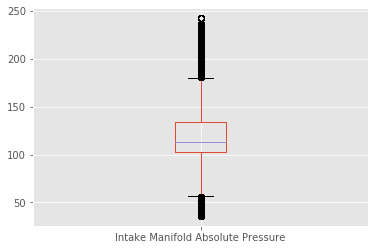

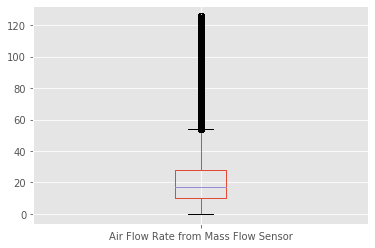

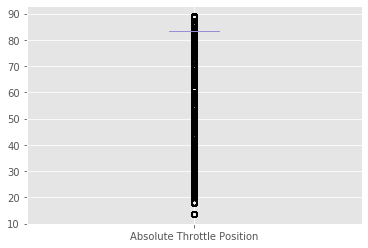

In [10]:
# Box plots
data['Intake Manifold Absolute Pressure'].plot(kind='box')
plt.show()
data['Air Flow Rate from Mass Flow Sensor'].plot(kind='box')
plt.show()
data['Absolute Throttle Position'].plot(kind='box')
plt.show()


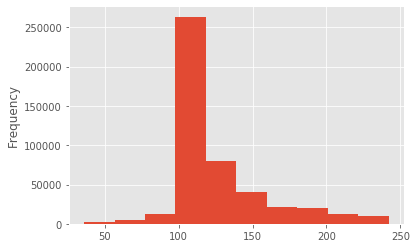

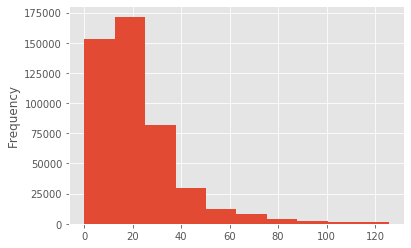

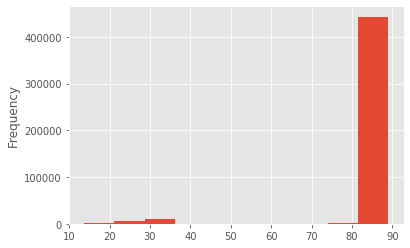

In [11]:
# Box plots
data['Intake Manifold Absolute Pressure'].plot(kind='hist')
plt.show()
data['Air Flow Rate from Mass Flow Sensor'].plot(kind='hist')
plt.show()
data['Absolute Throttle Position'].plot(kind='hist')
plt.show()


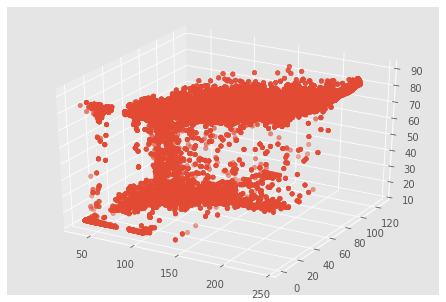

In [13]:

x = data['Intake Manifold Absolute Pressure']
y = data['Air Flow Rate from Mass Flow Sensor']
z = data['Absolute Throttle Position']

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x,y,z)
plt.show()

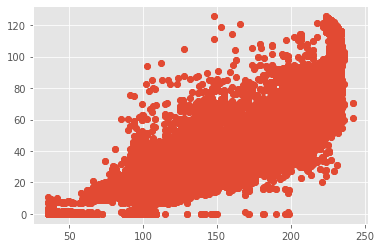

In [21]:
#scatter plots
MAP = data['Intake Manifold Absolute Pressure']
MAF = data['Air Flow Rate from Mass Flow Sensor']
T_POS = data['Absolute Throttle Position']
plt.scatter(MAP,MAF)
#plt.scatter(MAF,MAP)
#plt.scatter(MAP,T_POS)
#plt.scatter(MAF,T_POS)

In [20]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Engine Coolant Temperature,Intake Manifold Absolute Pressure,Engine RPM,Vehicle Speed Sensor,Intake Air Temperature,Air Flow Rate from Mass Flow Sensor,Absolute Throttle Position,Ambient Air Temperature,Accelerator Pedal Position D,Accelerator Pedal Position E,TripID
Engine Coolant Temperature,1.0,0.19,0.2,0.3,0.017,0.17,-0.015,0.0097,-0.006,-0.0054,0.14
Intake Manifold Absolute Pressure,0.19,1.0,0.66,0.67,-0.16,0.87,0.13,0.047,0.48,0.48,0.16
Engine RPM,0.2,0.66,1.0,0.83,-0.5,0.79,-0.0039,0.032,0.35,0.35,0.18
Vehicle Speed Sensor,0.3,0.67,0.83,1.0,-0.3,0.73,0.032,0.054,0.19,0.19,0.24
Intake Air Temperature,0.017,-0.16,-0.5,-0.3,1.0,-0.24,0.087,0.21,-0.1,-0.1,-0.017
Air Flow Rate from Mass Flow Sensor,0.17,0.87,0.79,0.73,-0.24,1.0,0.0042,0.04,0.51,0.51,0.2
Absolute Throttle Position,-0.015,0.13,-0.0039,0.032,0.087,0.0042,1.0,-0.02,0.03,0.024,-0.24
Ambient Air Temperature,0.0097,0.047,0.032,0.054,0.21,0.04,-0.02,1.0,-0.044,-0.044,0.23
Accelerator Pedal Position D,-0.006,0.48,0.35,0.19,-0.1,0.51,0.03,-0.044,1.0,0.99,0.02
Accelerator Pedal Position E,-0.0054,0.48,0.35,0.19,-0.1,0.51,0.024,-0.044,0.99,1.0,0.021


In [35]:
model_df = data.drop(['Time', 'Engine Coolant Temperature', 'Engine RPM',
       'Vehicle Speed Sensor', 'Intake Air Temperature','Absolute Throttle Position',
       'Ambient Air Temperature', 'Accelerator Pedal Position D',
       'Accelerator Pedal Position E', 'TripID'], axis=1)
model_df.shape[1]

2

In [36]:
from sklearn.ensemble import IsolationForest

e:\envirocar\venv\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
e:\envirocar\venv\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


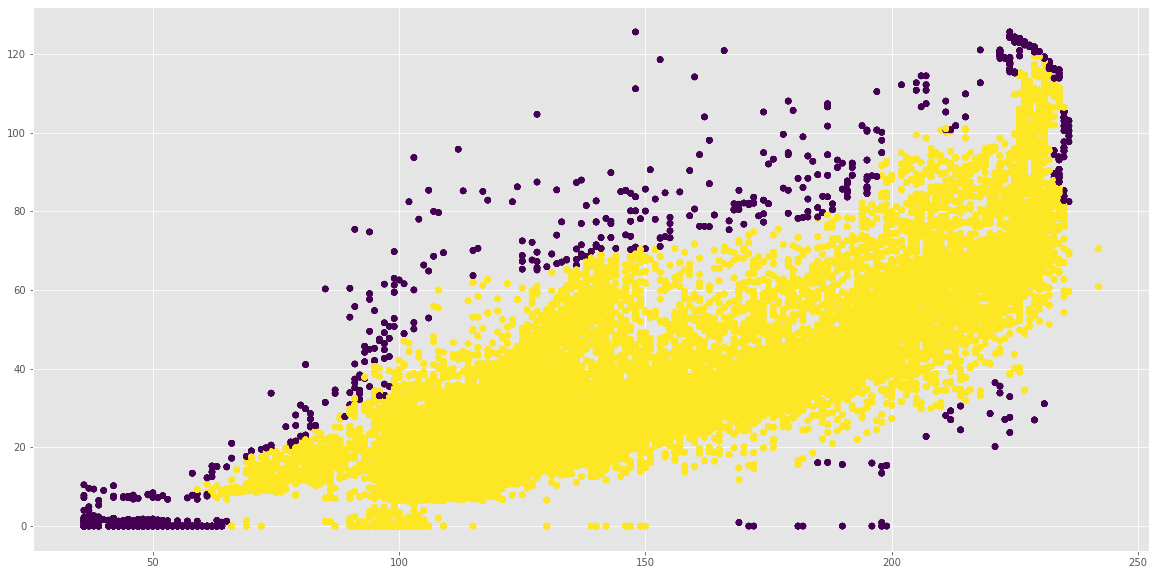

In [33]:
outlier_detect = IsolationForest(n_estimators=100, max_samples=1000, contamination=.01, max_features=model_df.shape[1])
outlier_detect.fit(model_df)
outliers_predicted = outlier_detect.predict(model_df)

#check the results
model_df['outlier'] = outliers_predicted
plt.figure(figsize = (20,10))
plt.scatter(model_df['Intake Manifold Absolute Pressure'], model_df['Air Flow Rate from Mass Flow Sensor'], c=model_df['outlier'])
plt.show()

In [34]:
import pickle
filename = 'anomaly_detection.sav'
pickle.dump(outlier_detect, open(filename,'wb'))